# Hi mọi người, mình sẽ tiếp tục học về Classification nhé.
- Chương này nói về classification (phân loại) – một kỹ thuật dự đoán biến phản hồi (response variable) định tính (qualitative) hay còn gọi là categorical (phân loại), trái ngược với hồi quy tuyến tính (linear regression) dùng cho biến phản hồi định lượng (quantitative).

## Trước khi bắt đầu, tại sao chúng ta không dùng Linear Regression cho Classification?
- Nếu biến categorical có 3 lớp (multi-class): Ví dụ bạn muốn forecast khả năng của bạn bị 1 trong 3 loại bệnh stroke, drug overdose và epileptic seizure. Giả sử bạn mã hóa biến Y như sau: Y = 1 nếu bị stroke (đột quỵ) Y = 2 nếu bị drug overdose (quá liều thuốc). Y = 3 nếu bị epileptic seizure (động kinh) x <br>
$\Rightarrow$ Vấn đề: Linear Regression sẽ áp đặt thứ tự giữa các lớp mà không có lý do (ví dụ: 2 gần 1 hơn 3) → không hợp lý.

- Trường hợp 2 lớp (binary classification): Giả sử: Y = 0 nếu stroke Y = 1 nếu drug overdose → Dùng hồi quy tuyến tính sẽ cho ra giá trị liên tục (ví dụ: Y = 0.6). Nếu Y > 0.5 thì dự đoán là 1 (drug overdose). Nhược điểm: Kết quả có thể vượt ra khỏi [0, 1] <br>
$\Rightarrow$ khó diễn giải như xác suất. Không phù hợp khi có nhiều lớp.

- Kết luận: Có 2 lý do chính để KHÔNG dùng Linear Regression cho phân loại: 
1) Regression không xử lý tốt biến phản hồi có nhiều lớp
2) regression không cho ra kết quả có ý nghĩa về mặt xác suất khi biến phản hồi là phân loại.

# Logistic Regression
> Thuật toán đầu tiên trong Classification mà chúng ta tìm hiểu sẽ là Logistic Regression.
## Dạng hàm Logistic (Sigmoid function)
- Khác với Linear Regression, Logistic Regression không dự đoán giá trị liên tục mà dự đoán xác suất của biến phản hồi (response variable) thuộc về một lớp nhất định.
- Các tính chất cần thiết cho hàm Logistic:
  - Đầu ra là xác suất trong khoảng [0, 1].
  - Là 1 hàm smooth nên có thể đạo hàm tại mọi điểm.
- Có nhiều hàm sigmoid có đáp ứng các tính chất trên, nhưng dạng hàm phổ bến nhất là: 
$$
\mathcal{z_i} = \sigma(z) = \frac{1}{1 + e^{-y_i}} \\
\text{với } y_i = w_0 + w_1 x_{1i} + w_2 x_{2i} + \dots + w_n x_{ni} = \mathbf{w}^T \mathbf{x}
$$
- Đồ thị của hàm sigmoid có hình chữ S, với giá trị đầu vào z càng lớn thì xác suất càng gần 1, và ngược lại.
Example:


## Loss function 
- Để huấn luyện mô hình Logistic Regression, chúng ta cần một hàm mất mát (loss function) để đo lường độ chính xác của dự đoán.
- Hàm mất mát phổ biến nhất cho Logistic Regression là Cross-Entropy Loss (hay còn gọi là Log Loss). Trước tiên thì hãy tìm hiểu về Entropy.

### Entropy
- Entropy Là độ đo của sự bất định (uncertainty). Trả lời câu hỏi: "Trung bình cần bao nhiêu thông tin để mô tả một sự kiện xảy ra?"
- Công thức tính entropy của một biến ngẫu nhiên rời rạc X với các giá trị khả dĩ $x_1, x_2, ..., x_n$ và xác suất tương ứng $p_1, p_2, ..., p_n$ là:
$$
  H(X) = -K \sum_{i=1}^{n} p_i \log(p_i) \\
  \text{ Nếu dùng log cơ số 2 thì đơn vị là bit} \\
  \text{ Nếu dùng log tự nhiên thì đơn vị là nats.}
$$
- Khi p=1, H(X) = 0, nghĩa là không có bất định (uncertainty) vì ta đã biết chắc chắn kết quả xảy ra.
- Lấy ví dụ về tung xúc sắc, nếu xúc sắc là công bằng thì xác suất của mỗi mặt là 1/6. Khi đó, entropy sẽ là xấp xỉ 2.585 bits. Điều này có nghĩa là cần trung bình khoảng 2.585 bits thông tin để mô tả kết quả của việc tung xúc sắc hay nói cách khác bạn cần ít nhất 3 câu hỏi yes/no để xác định mặt xúc xắc 

### Binary Cross-Entropy
- Cross-entropy đo độ khác biệt giữa hai phân phối xác suất: một là phân phối thật (ground truth) p, một là phân phối dự đoán q.
- Công thức tính Cross-Entropy giữa hai phân phối xác suất p và q là:
$$
  H(p, q) = - \sum_{i=1}^{n} [p_i \log(\hat{p_i}) + (1 - p_i) \log(1 - \hat{p_i})] \\
$$
- Công thức này có thể được hiểu là trung bình của entropy của phân phối thật và phân phối dự đoán. Nói một cách dễ hiểu hơn thì nếu ta có một biến phản hồi nhị phân (binary response variable) Y với xác suất p, thì Cross-Entropy Loss sẽ đo lường độ khác biệt giữa xác suất thực tế p và xác suất dự đoán $\hat{p}$.


### Building the Loss Function
> Sau khi đã hiểu về Entropy nói chung và Cross-Entropy nói riêng, chúng ta sẽ tiến hành xây loss function cho Logistic Regression.
> Lưu ý: $\mathbf{x} = [\mathbf{x_1}, \mathbf{x_2}, \dots, \mathbf{x_d}] \in \mathbf{R}^d $ là input vector <br> $\mathbf{w} = [\mathbf{w_0}, \mathbf{w_1}, \dots, \mathbf{w_d}] \in \mathbf{R}^d$ là weight vector. 
- Đầu tiên, hãy giả sử $$P(\mathbf{y_i} = 1 | \mathbf{x}_i, \mathbf{w}) = \mathbf{z_i} \quad \text{và} \quad P(\mathbf{y_i} = 0 | \mathbf{x}_i) = 1 - \mathbf{z_i}$$
- Đến đoạn này bạn có thấy gì quen quen không? Có trông giống dạng hàm của phân phối nào không? Đúng rồi, nó giống với Bernoulli distribution. Vậy nên ta sẽ giả định rằng biến phản hồi $y_i$ tuân theo phân phối Bernoulli với xác suất thành công là $\mathbf{z_i}$. Khi đó, ta có: 
$$ P(\mathbf{y_i} | \mathbf{x}_i, \mathbf{w}) = \mathbf{z_i}^{\mathbf{y_i}} (1 - \mathbf{z_i})^{1 - \mathbf{y_i}} $$
> Bạn có thể tự chứng minh bằng cách thử với từng trường hợp của $y_i$ 
$$\Rightarrow \textbf{Oke, bây giờ câu hỏi đặt ra là chúng ta phải tìm tham số nhằm mục đích gì ? }$$
- Chúng ta không thể dùng OLS như trong Linear Regression vì lý do như mình trình bày ở đầu chương và hơn nữa mục đích của OLS là làm cho dự đoán của chúng ta gần với giá trị thực tế nhất có thể. Nhưng trong case của Logistic Regression, chúng ta cần tìm tham số để phân phối xác suất mô hình “gần nhất” với phân phối sinh ra dữ liệu quan sát, dưới giả định phân phối ban đầu (Bernoulli). Do đó, phương pháp tìm tham số sẽ là Maximum Likelihood Estimation (MLE) thay vì OLS.
Giả sử chúng ta có một bài toán phân loại nhị phân, trong đó biến phản hồi $y_i \in \{0, 1\}$ và các biến đầu vào $\mathbf{x}_i \in \mathbb{R}^k$.  
- Với toàn bộ training set $\mathbf{X} = \{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n\}$ và biến phản hồi $\mathbf{y} = \{y_1, y_2, \dots, y_n\}$, ta cần tìm tham số $\mathbf{w}$ sao cho hàm likelihood $L(\mathbf{w})$ là lớn nhất:
$$ \mathbf{w} = \underset{\mathbf{w}}{\text{argmax}} P(\mathbf{y} | \mathbf{X}, \mathbf{w}) = \underset{\mathbf{w}}{\text{argmax}} \prod_{i=1}^{n} \mathbf{z_i}^{y_i} (1 - \mathbf{z_i})^{1 - y_i} $$
- Để giải được bài toán trên không đơn giản, một phương pháp thường dùng là chuyển sang log-likelihood và chuyển bài toán thành dạng tối thiểu hóa:
$$ \log L(\mathbf{w}) = - \log \prod_{i=1}^{n} \mathbf{z_i}^{y_i} (1 - \mathbf{z_i})^{1 - y_i} = - \sum_{i=1}^{n} [y_i \log(\mathbf{z_i}) + (1 - y_i) \log(1 - \mathbf{z_i})] $$
> Ở đây chúng ta sẽ apply các phương pháp tìm nghiệm trong Optimization như Stochastic Gradient Descent kết hợp nhiều technique khác để giải bài toán này. Quy trình khá phức tạp nên mình sẽ để các bạn tự tìm hiểu nhé.

## Multinomial Logistic Regression
- Logistic Regression có thể mở rộng cho trường hợp phân loại đa lớp (multi-class classification) thông qua Multinomial Logistic Regression (hay Softmax Regression).
- Dạng hàm Softmax: 
$$P(y_i = k \mid \mathbf{x}_i) = \frac{e^{\mathbf{w}_k^T \mathbf{x}_i}}{\sum_{j=1}^K e^{\mathbf{w}_j^T \mathbf{x}_i}} \\
\text{với } z_i = w_0 + w_1 x_{1i} + w_2 x_{2i} + \dots + w_n x_{ni} = \mathbf{w}^T \mathbf{x}
$$
- Loss function:
$$L(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{i=1}^n \sum_{k=1}^K \mathbb{1}(y_i = k) \cdot \log P(y_i = k \mid \mathbf{x}_i)$$

## Tóm tắt quy trình
- Oke vậy cứ coi là chúng ta đã nắm được các công thức toán cơ bản của model này rồi nhé. Giờ mình sẽ tóm tắt lại 2 quy trình train và predict của Logistic Regression 1 cách tổng quát (multinomial) để các bạn dễ hình dung hơn nhé.
### Quy trình huấn luyện (Training)
- Đưa dữ liệu đầu vào vào Loss Function để tìm tham số $\mathbf{w}$ sao cho hàm mất mát là nhỏ nhất, nên nhớ lúc này chúng ta có k vector tham số w tương ứng với k classes.
- Sử dụng các phương pháp tối ưu hóa như Gradient Descent để cập nhật tham số $\mathbf{w}$.
### Quy trình dự đoán (Prediction)
- Đưa datapoint x mà chúng ta muốn tìm class của nó vào hàm softmax để tính xác suất của từng lớp.
> Vì chúng ta đã tìm được tham số k vector tham số w, công thức của softmax chính là = score của datapoint tại 1 class chia cho tổng score của tất cả các class.
- Sau cùng chúng ta sẽ có 1 vector xác suất có size là k tương ứng với k classes. Chúng ta sẽ chọn class có xác suất cao nhất làm dự đoán cuối cùng cho datapoint x.

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
 
# Load the dataset
file_path = r'c:\Users\Huy\Downloads\multinomial_logistic_sample.csv'
data = pd.read_csv(file_path)
 
# Prepare the data
X = data[['Gender', 'Math_Score', 'English_Score', 'Interest']]
y = data['Major']
 
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Gender', 'Interest'], drop_first=True)
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Create and train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
 
# Make predictions
y_pred = model.predict(X_test)
 
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Arts       1.00      1.00      1.00         1
    Business       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Epoch 0, Loss: 0.090986, Weights: [0.         0.24644698 0.24360677]
Epoch 100, Loss: 0.002503, Weights: [-2.60627600e-04  6.53143876e-01  6.48919322e-01]
Epoch 200, Loss: 0.001311, Weights: [-0.0008134   0.72892644  0.72504199]
Epoch 300, Loss: 0.000895, Weights: [-0.00126835  0.77413681  0.77056456]
Epoch 400, Loss: 0.000681, Weights: [-0.00165888  0.80655209  0.80325674]
Epoch 500, Loss: 0.000552, Weights: [-0.00200391  0.83187383  0.82882666]
Epoch 600, Loss: 0.000464, Weights: [-0.00231484  0.85267333  0.84985145]
Epoch 700, Loss: 0.000401, Weights: [-0.00259905  0.87033367  0.86771857]
Epoch 800, Loss: 0.000353, Weights: [-0.00286164  0.88568563  0.88326201]
Epoch 900, Loss: 0.000316, Weights: [-0.0031063   0.89926771  0.8970227 ]

✅ Trọng số cuối cùng: [-0.00333356  0.91133328  0.90925428]
➡️ Tổng độ lớn trọng số: 1.2873549650811758


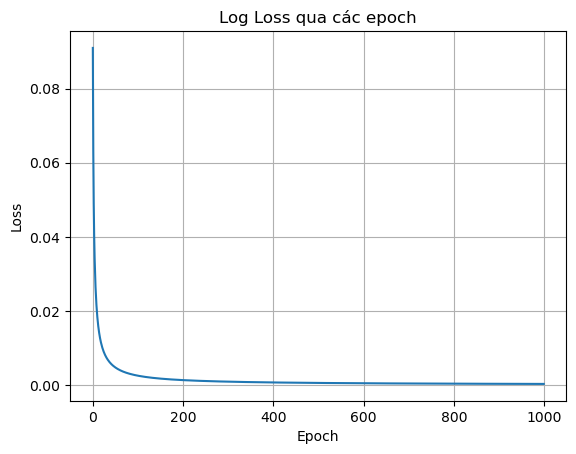

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu phân tách rõ ràng
np.random.seed(0)
n = 100

# Lớp 0: cụm ở (0, 0)
X0 = np.random.normal(loc=-5, scale=1, size=(n, 2))
y0 = np.zeros(n)

# Lớp 1: cụm ở (5, 5)
X1 = np.random.normal(loc=5, scale=1, size=(n, 2))
y1 = np.ones(n)

# Kết hợp dữ liệu
X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])

# Thêm cột 1 cho bias term
X_aug = np.hstack([np.ones((X.shape[0], 1)), X])

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm loss (log loss)
def loss_fn(w, X, y):
    z = X @ w
    p = sigmoid(z)
    return -np.mean(y * np.log(p + 1e-8) + (1 - y) * np.log(1 - p + 1e-8))

# Gradient descent
w = np.zeros(X_aug.shape[1])
lr = 0.1
losses = []

for epoch in range(1000):
    z = X_aug @ w
    p = sigmoid(z)
    grad = X_aug.T @ (p - y) / len(y)
    w -= lr * grad
    current_loss = loss_fn(w, X_aug, y)
    losses.append(current_loss)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {current_loss:.6f}, Weights: {w}")

# In kết quả cuối cùng
print("\n✅ Trọng số cuối cùng:", w)
print("➡️ Tổng độ lớn trọng số:", np.linalg.norm(w))

# Vẽ loss theo epoch
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Log Loss qua các epoch")
plt.grid(True)
plt.show()
